In [1]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree  import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('02-14-2018.csv')
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [3]:
df_pr = df.loc[:,['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Label']]
df_pr

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,10,Benign
4,22,6,8804066,14,11,Benign
...,...,...,...,...,...,...
1048570,80,6,10156986,5,5,Benign
1048571,80,6,117,2,0,Benign
1048572,80,6,5095331,3,1,Benign
1048573,80,6,5235511,3,1,Benign


In [4]:
df_pr['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [5]:
df_pr.isnull().sum()

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
Label            0
dtype: int64

In [6]:
df_pr['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

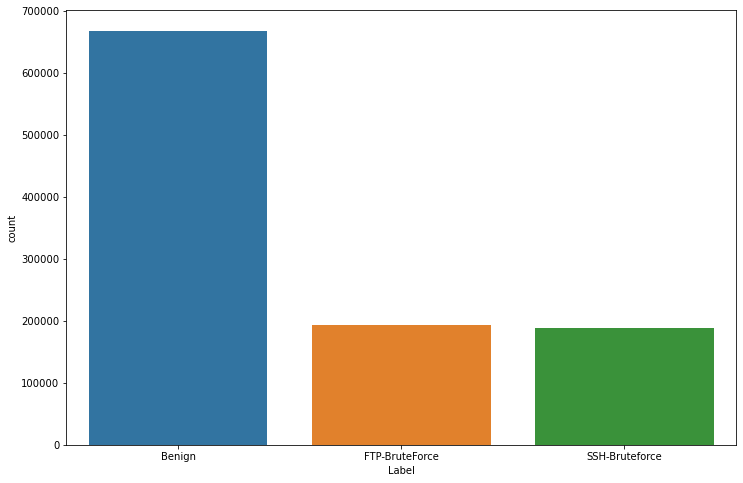

In [7]:
ax = sns.countplot(x="Label",data=df_pr)
ax.figure.set_size_inches(12, 8)

In [8]:
label_encoder = LabelEncoder()
labels_df = label_encoder.fit_transform(df_pr.Label)
labels_df

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
df_pr['Label']=labels_df
df_pr

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,0,0,112641719,3,0,0
1,0,0,112641466,3,0,0
2,0,0,112638623,3,0,0
3,22,6,6453966,15,10,0
4,22,6,8804066,14,11,0
...,...,...,...,...,...,...
1048570,80,6,10156986,5,5,0
1048571,80,6,117,2,0,0
1048572,80,6,5095331,3,1,0
1048573,80,6,5235511,3,1,0


In [10]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for treino, teste in split.split(df_pr, df_pr["Label"]):
    strat_treino = df_pr.loc[treino]
    strat_teste = df_pr.loc[teste]

In [11]:
strat_treino

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
135924,21,6,5,1,1,1
571728,53,17,492,1,1,0
1026967,3389,6,3467731,10,7,0
14149,21,6,2,1,1,1
418098,53,17,581,1,1,0
...,...,...,...,...,...,...
179322,21,6,2,1,1,1
593301,53,17,1307,1,1,0
924995,80,6,5313112,2,1,0
995927,3389,6,2423668,8,7,0


In [12]:
strat_teste

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
571357,0,0,80895,2,0,0
442302,53,17,644,1,1,0
639345,80,6,55139789,2,0,0
924873,50212,6,287,2,1,0
129093,21,6,1,1,1,1
...,...,...,...,...,...,...
351203,22,6,376396,22,22,2
123206,21,6,2,1,1,1
306860,22,6,374766,21,22,2
608473,3389,6,2398026,10,7,0


In [13]:
Xtreino = strat_treino.iloc[:,:-1]
Ytreino = strat_treino['Label']

Xteste = strat_teste.iloc[:,:-1]
Yteste = strat_teste['Label']

In [14]:
Xtreino

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts
135924,21,6,5,1,1
571728,53,17,492,1,1
1026967,3389,6,3467731,10,7
14149,21,6,2,1,1
418098,53,17,581,1,1
...,...,...,...,...,...
179322,21,6,2,1,1
593301,53,17,1307,1,1
924995,80,6,5313112,2,1
995927,3389,6,2423668,8,7


In [15]:
Ytreino

135924     1
571728     0
1026967    0
14149      1
418098     0
          ..
179322     1
593301     0
924995     0
995927     0
933846     0
Name: Label, Length: 838860, dtype: int32

In [16]:
Xteste

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts
571357,0,0,80895,2,0
442302,53,17,644,1,1
639345,80,6,55139789,2,0
924873,50212,6,287,2,1
129093,21,6,1,1,1
...,...,...,...,...,...
351203,22,6,376396,22,22
123206,21,6,2,1,1
306860,22,6,374766,21,22
608473,3389,6,2398026,10,7


In [17]:
Yteste

571357    0
442302    0
639345    0
924873    0
129093    1
         ..
351203    2
123206    1
306860    2
608473    0
530638    0
Name: Label, Length: 209715, dtype: int32

In [18]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

### KNN 

In [19]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(Xtreino, Ytreino)

KNeighborsClassifier(n_neighbors=6)

In [20]:
KNN.score(Xtreino, Ytreino), KNN.score(Xteste, Yteste)

(0.9977970102281668, 0.9971485110745536)

### Random Forest Classifier

In [21]:
RF = RandomForestClassifier()
RF.fit(Xtreino, Ytreino)
   
RF.score(Xtreino, Ytreino), RF.score(Xteste, Yteste)

(0.999971389743223, 0.999952316238705)

In [23]:
RF.feature_importances_

array([0.56707993, 0.02555226, 0.25506019, 0.09969608, 0.05261155])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
y_pred = RF.predict(Xteste)

In [29]:
print(classification_report(Yteste, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    133525
           1       1.00      1.00      1.00     38672
           2       1.00      1.00      1.00     37518

    accuracy                           1.00    209715
   macro avg       1.00      1.00      1.00    209715
weighted avg       1.00      1.00      1.00    209715



In [31]:
print(confusion_matrix(Yteste, y_pred))

[[133525      0      0]
 [     0  38672      0]
 [     0     10  37508]]


### SVM Classifier 

In [ ]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(Xtreino, Ytreino)

In [ ]:
Linear_SVC.score(Xtreino, Ytreino), Linear_SVC.score(Xteste, Yteste)

### Decision Tree Classifier

In [59]:
DT =DecisionTreeClassifier(max_features=5, max_depth=4)
DT.fit(Xtreino, Ytreino)

DecisionTreeClassifier(max_depth=4, max_features=5)

In [60]:
DT.score(Xtreino, Ytreino), DT.score(Xteste, Yteste)

(0.9999558925208021, 0.9999332427341868)

[Text(0.6666666666666666, 0.9, 'X[0] <= 22.5\ngini = 0.529\nsamples = 838860\nvalue = [534101, 154688, 150071]'),
 Text(0.5555555555555556, 0.7, 'X[0] <= 21.5\ngini = 0.529\nsamples = 314496\nvalue = [9737, 154688, 150071]'),
 Text(0.3333333333333333, 0.5, 'X[2] <= 54.0\ngini = 0.109\nsamples = 164185\nvalue = [9477, 154688, 20]'),
 Text(0.2222222222222222, 0.3, 'X[0] <= 20.5\ngini = 0.0\nsamples = 154716\nvalue = [8, 154688, 20]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 154710\nvalue = [2, 154688, 20]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 9469\nvalue = [9469, 0, 0]'),
 Text(0.7777777777777778, 0.5, 'X[2] <= 669710.5\ngini = 0.003\nsamples = 150311\nvalue = [260, 0, 150051]'),
 Text(0.6666666666666666, 0.3, 'X[4] <= 0.5\ngini = 0.0\nsamples = 150066\nvalue = [15, 0, 150051]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.32\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.7777777777777

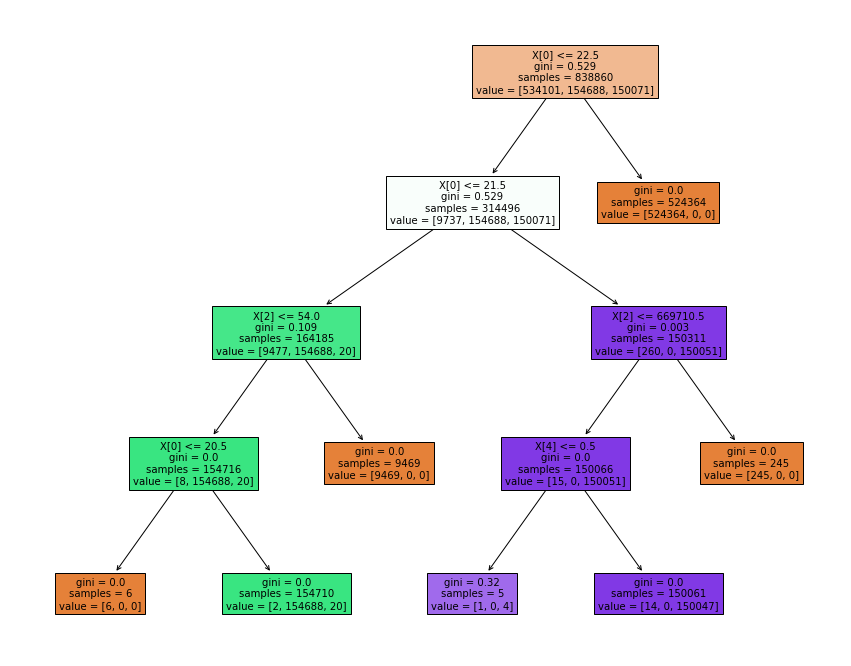

In [61]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)